In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import StringIO
from matplotlib import pyplot as plt

import datetime, time
import os

import json
import requests
from bs4 import BeautifulSoup
from pprint import pprint

import pytrends as pt
from pytrends.request import TrendReq

% matplotlib inline

In [86]:
def getJSON(url):
    start_time = time.time()
    header = {'x-requested-with': 'XMLHttpRequest'}
    mainPage = requests.get(url, headers = header)
    data = mainPage.json()
    print('Query finished in ' + str(time.time() - start_time))
    return data

In [87]:
#get CMC Symbol Info from API
try:
    data = getJSON("https://api.coinmarketcap.com/v1/ticker/")
except ValueError:
    print "CMC API Not Responding"

#write to dictionary
token_dict = {}

for x in range (0,50):
    token_dict[data[x]['symbol']] = data[x]['name']
    
print token_dict

Query finished in 0.260862112045
{u'NEO': u'NEO', u'BCN': u'Bytecoin', u'KMD': u'Komodo', u'BCH': u'Bitcoin Cash', u'GNT': u'Golem', u'STEEM': u'Steem', u'PAY': u'TenX', u'REP': u'Augur', u'XLM': u'Stellar Lumens', u'BAT': u'Basic Attention Token', u'BCC': u'BitConnect', u'EOS': u'EOS', u'ETC': u'Ethereum Classic', u'ETH': u'Ethereum', u'GNO': u'Gnosis', u'DGB': u'DigiByte', u'FCT': u'Factom', u'DGD': u'DigixDAO', u'QTUM': u'Qtum', u'STRAT': u'Stratis', u'LSK': u'Lisk', u'CVC': u'Civic', u'HSR': u'Hshare', u'PPT': u'Populous', u'DCR': u'Decred', u'GBYTE': u'Byteball', u'ICN': u'Iconomi', u'NXS': u'Nexus', u'ZEC': u'Zcash', u'ZRX': u'0x', u'DASH': u'Dash', u'MCAP': u'MCAP', u'MIOTA': u'IOTA', u'MTL': u'Metal', u'VERI': u'Veritaseum', u'USDT': u'Tether', u'XRP': u'Ripple', u'XMR': u'Monero', u'BTCD': u'BitcoinDark', u'LTC': u'Litecoin', u'OMG': u'OmiseGO', u'BTS': u'BitShares', u'XEM': u'NEM', u'DOGE': u'Dogecoin', u'PIVX': u'PIVX', u'MAID': u'MaidSafeCoin', u'BTC': u'Bitcoin', u'WAVES':

In [78]:
token1 = 'ETH'
token2 = 'BTC'

#Get Historical Price Data
search_url = 'https://min-api.cryptocompare.com/data/histoday?fsym='+token1+'&tsym='+token2+'&limit=2000&aggregate=1&e=CCCAGG'
result = getJSON(search_url)

Query finished in 1.47253489494


In [79]:
price_data = pd.DataFrame(result['Data'])
price_data['date'] = pd.to_datetime(price_data['time'],unit='s')
price_data = price_data.set_index('date')

In [80]:
(price_data[price_data.close>0]).index.min()

Timestamp('2015-08-07 00:00:00')

In [81]:
pytrend = TrendReq()
pytrend.build_payload([token_dict[token1],token_dict[token2]], cat=0, timeframe='today 5-y', geo='', gprop='')
google_index_data = pytrend.interest_over_time()

# pytrend.build_payload([token_dict[token1],token_dict[token2]], cat=0, timeframe='now 7-d', geo='', gprop='')
# google_index_data_extend = pytrend.interest_over_time()

# google_index_data = google_index_data.append(google_index_data_extend)

In [82]:
# truncate data
date_start = datetime.datetime(2017,1,1)
date_start = max((price_data[price_data.close>0]).index.min(),date_start)
price_data_trunc = price_data[price_data.index>=date_start]
google_index_data_trunc = (google_index_data[google_index_data.index>=date_start]).copy()
google_index_data_trunc['index_exchange'] = google_index_data_trunc[token_dict[token1]]/google_index_data_trunc[token_dict[token2]]

In [83]:
google_index_adjustment_rate = price_data_trunc['close'].mean()/google_index_data_trunc['index_exchange'].mean()

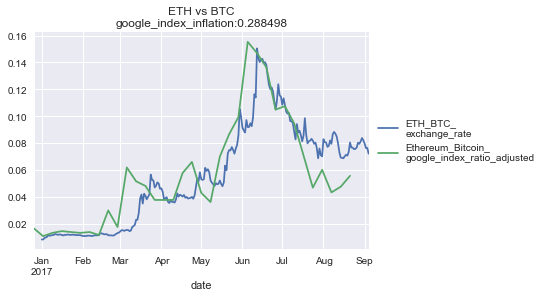

In [84]:
(price_data_trunc['close']).plot(label=token1+'_'+token2+'_\nexchange_rate')
(google_index_data_trunc['index_exchange']*google_index_adjustment_rate).plot(label=token_dict[token1]+'_'+token_dict[token2]+'_\ngoogle_index_ratio_adjusted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(token1+' vs '+token2+'\ngoogle_index_inflation:'+str(round(google_index_adjustment_rate,6)))
# plt.annotate()